# Data Visualization Assignment

This notebook contains solutions for various data visualization tasks including:
- Oil price trend analysis (Q1-Q3)
- Sales data analysis (Q4-Q5)
- Image processing with colormaps (Q6)
- Image filtering (Q7)

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image, ImageEnhance, ImageFilter, ImageOps

## Q1-Q3: Oil Price Trend Analysis (1992-2002)

**Data:** Use the 'wti-daily.csv' and 'brent-daily.csv' files into a data frame in which the Date column is treated as a datetime value and is set to be the index.

**Tasks:**
- Q1. Plot the average price trend of oil from 1992-2002 from wti-daily.csv
- Q2. Plot the average price trend of oil from 1992-2002 from brent-daily.csv
- Q3. Compare both the average prices of a barrel of oil from 1992-2002, indicate significant differences through markers

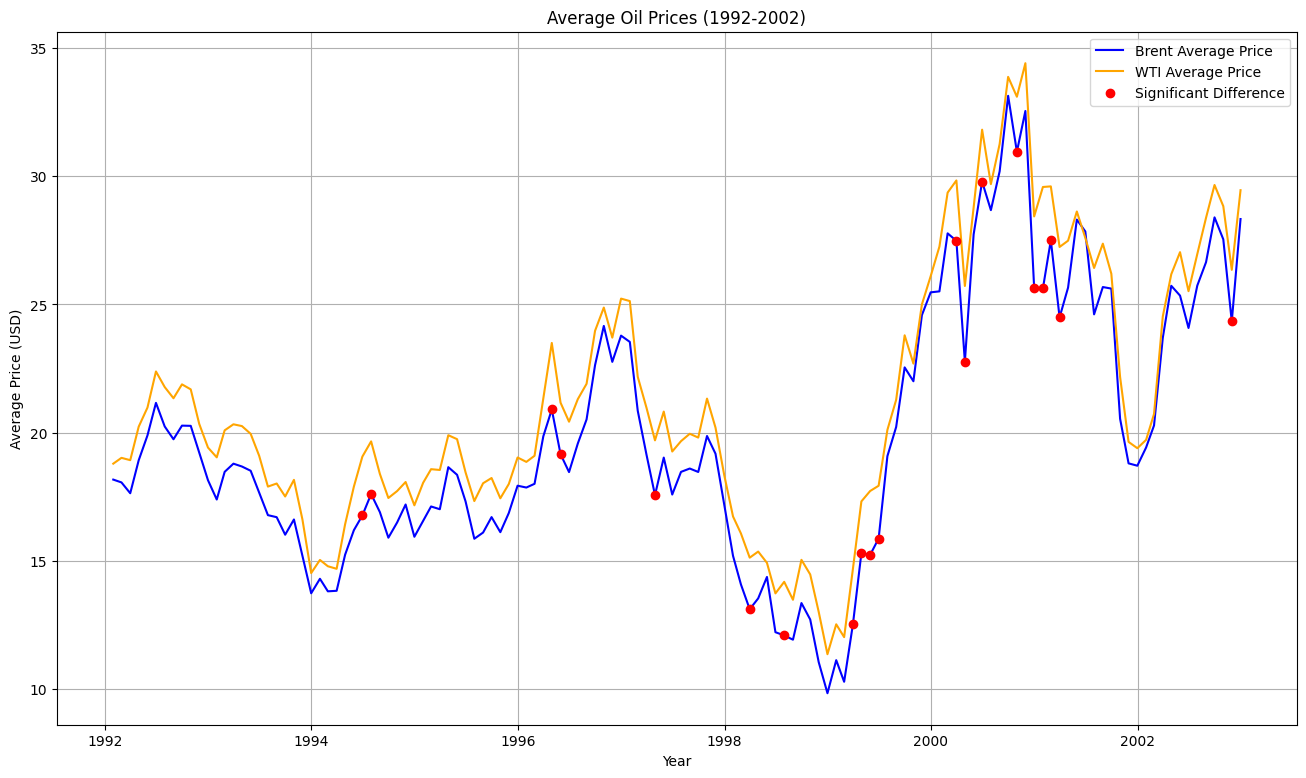

In [2]:
# Load the oil price data
brentDailyData = pd.read_csv('Data/brent-daily.csv')
wtiDailyData = pd.read_csv('Data/wti-daily.csv')

# Convert Date column to datetime and set as index
brentDailyData['Date'] = pd.to_datetime(brentDailyData['Date'])
wtiDailyData['Date'] = pd.to_datetime(wtiDailyData['Date'])
brentDailyData.set_index('Date', inplace=True)
wtiDailyData.set_index('Date', inplace=True)

# Filter data for 1992-2002
brent_1992_2002 = brentDailyData['1992-01-01':'2002-12-31']
wti_1992_2002 = wtiDailyData['1992-01-01':'2002-12-31']

# Calculate monthly averages
brent_avg = brent_1992_2002['Price'].resample('ME').mean()
wti_avg = wti_1992_2002['Price'].resample('ME').mean()

# Calculate price differences and identify significant points
price_diff = abs(brent_avg - wti_avg)
threshold = 2.0
significant_points = price_diff > threshold

# Plot the comparison
plt.figure(figsize=(16, 9))
plt.plot(brent_avg.index, brent_avg.values, label='Brent Average Price', color='blue')
plt.plot(wti_avg.index, wti_avg.values, label='WTI Average Price', color='orange')

# Mark significant differences
plt.scatter(brent_avg.index[significant_points], 
            brent_avg[significant_points],
            color='red',
            label='Significant Difference', 
            zorder=2)

plt.title('Average Oil Prices (1992-2002)')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Q4-Q5: Sales Data Analysis

**Data:** Use the 'sales.xlsx' to answer the questions Q4 and Q5.

**Tasks:**
- Q4. Plot the city wise distribution of sales, which city has contributed maximum in the sales
- Q5. Does payment methods have impact on sales, which payment method is contributing to the sales

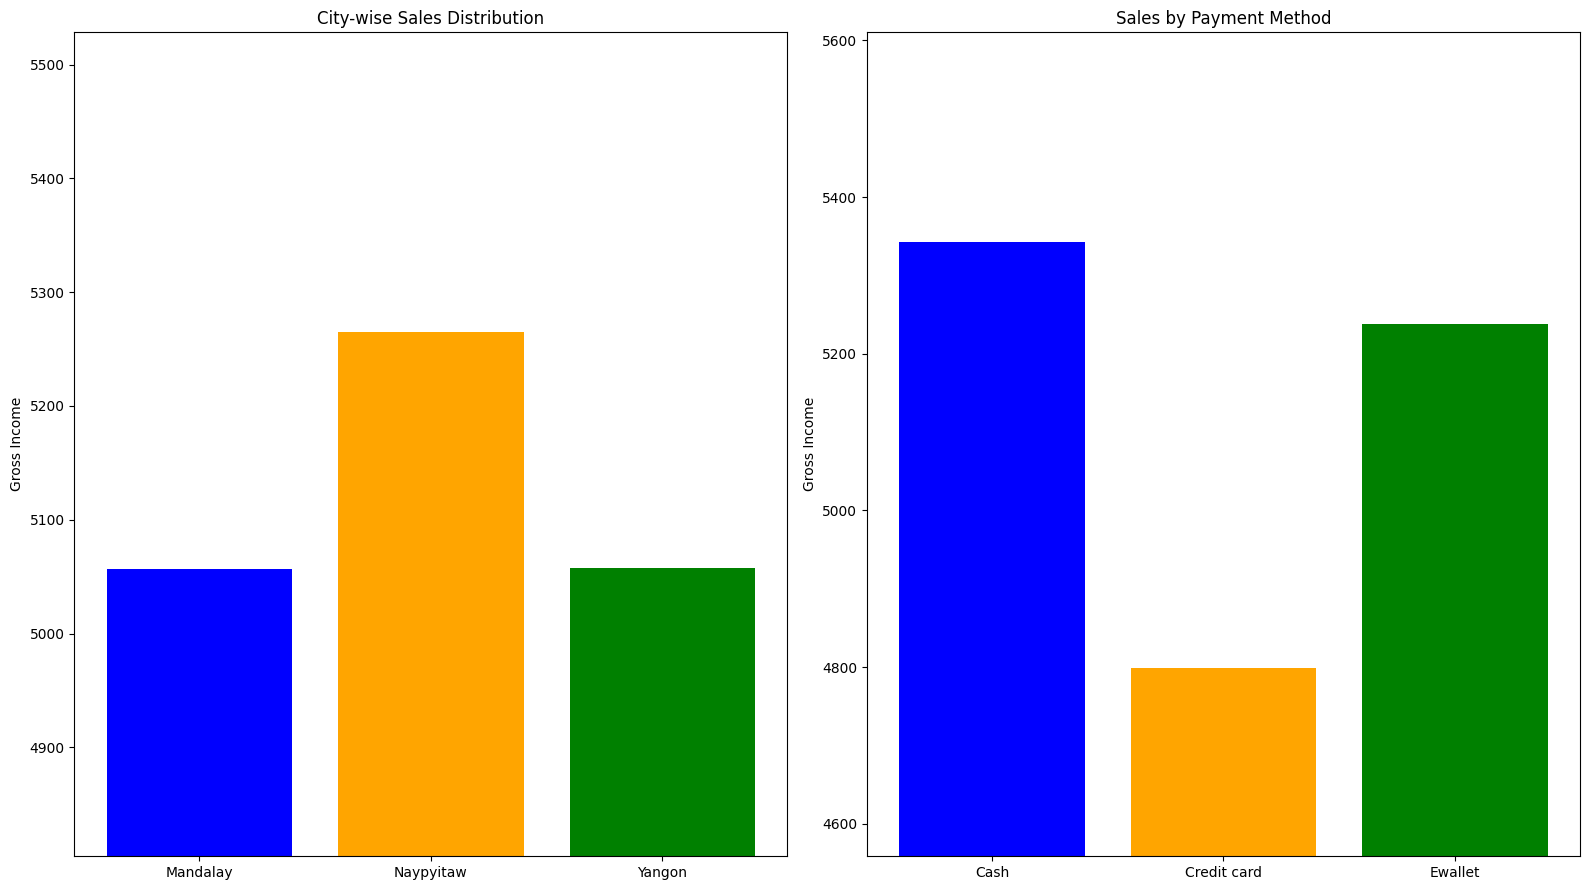

In [3]:
# Load sales data
salesData = pd.read_excel('Data/sales.xlsx')

# Drop unnecessary columns
salesData.drop(['Invoice ID', 'Branch', 'Customer type', 'Gender',
   'Product Code', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
    'COGS', 'gross margin percentage', 'Rating'], axis=1, inplace=True)

# Rename columns for clarity
salesData.rename(columns={'City': 'City', 'Payment': 'Payment Method', 'gross income': 'Gross Income'}, inplace=True)

# Aggregate sales by city and payment method
city_sales = salesData.groupby('City')['Gross Income'].sum().reset_index()
payment_sales = salesData.groupby('Payment Method')['Gross Income'].sum().reset_index()

# Create side-by-side plots
plt.figure(figsize=(16, 9))

# City-wise sales
plt.subplot(1, 2, 1)
plt.bar(city_sales['City'], city_sales['Gross Income'], color=['blue', 'orange', 'green'])
plt.ylim(city_sales['Gross Income'].min() * 0.95, city_sales['Gross Income'].max() * 1.05)
plt.title('City-wise Sales Distribution')
plt.ylabel('Gross Income')

# Payment method sales
plt.subplot(1, 2, 2)
plt.bar(payment_sales['Payment Method'], payment_sales['Gross Income'], color=['blue', 'orange', 'green'])
plt.ylim(payment_sales['Gross Income'].min() * 0.95, payment_sales['Gross Income'].max() * 1.05)
plt.title('Sales by Payment Method')
plt.ylabel('Gross Income')

plt.tight_layout()
plt.show()

## Q6: Image Colormaps

**Data:** Use '2.jpg' file to answer the question Q6.

**Task:** Read the image '2.jpg' into a NumPy array, apply six different types of 'cmaps', and put these images in six subplots.

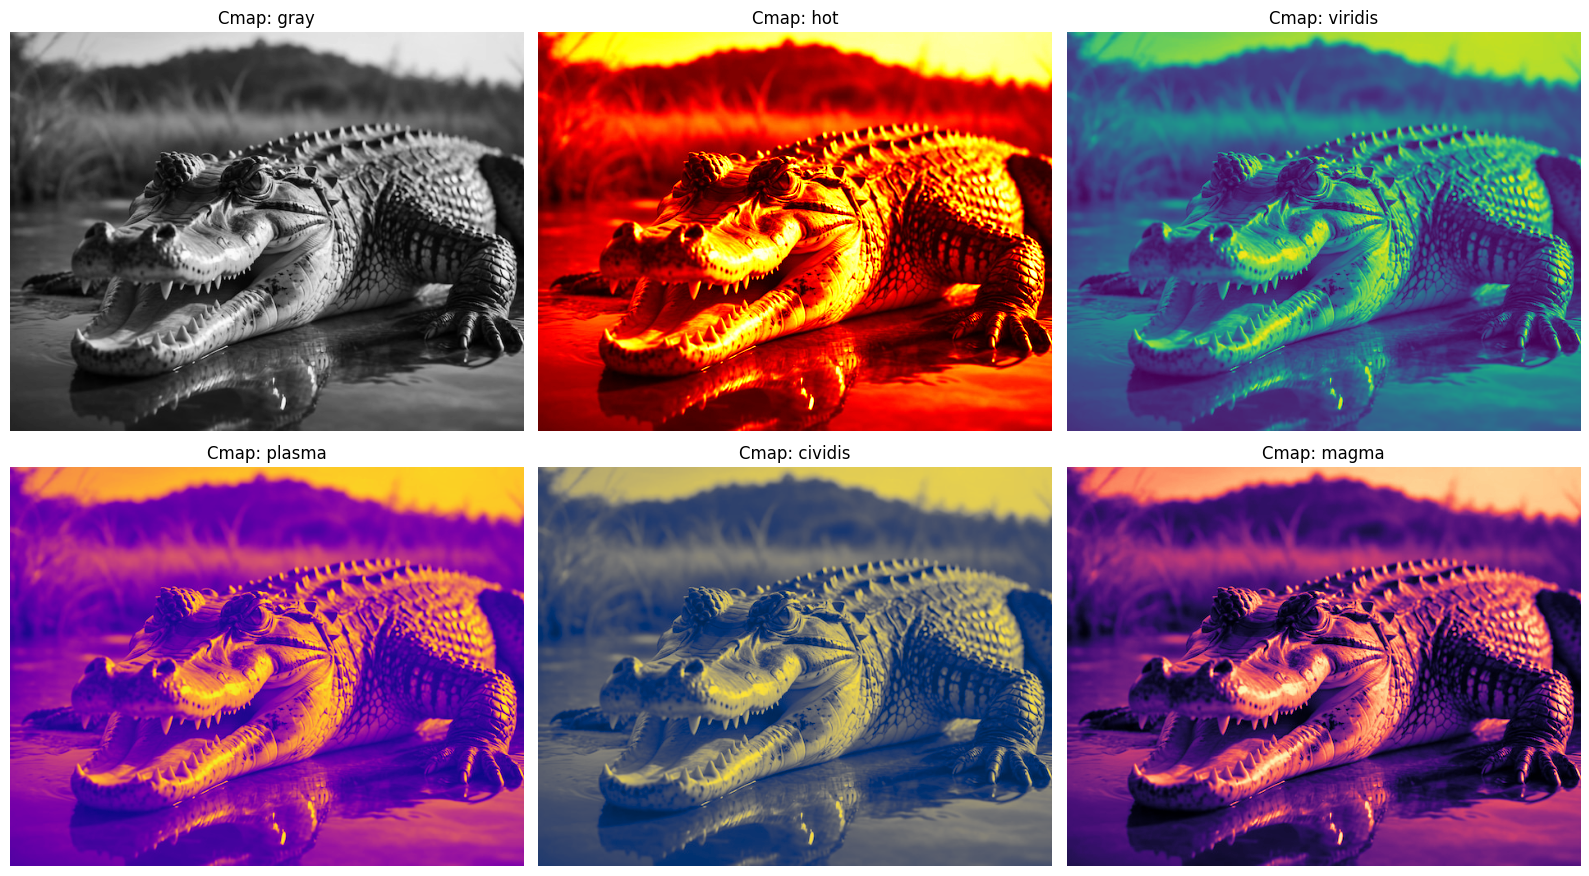

In [4]:
# Load and convert image to grayscale
img = Image.open('Data/2.jpg')
img_gray = ImageOps.grayscale(img)
img_array = np.array(img_gray)

# Define colormaps to apply
cmaps = ['gray', 'hot', 'viridis', 'plasma', 'cividis', 'magma']

# Create subplots with different colormaps
plt.figure(figsize=(16, 9))

for i, cmap in enumerate(cmaps):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_array, cmap=cmap)
    plt.title(f'Cmap: {cmap}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Q7: Image Filters

**Task:** Apply six basic filters on image '2.jpg'. Put these six images into two subplots of the following format:
- Total number of rows: 3
- 3 subplots in the 1st row
- 1 subplot in the 2nd row
- 2 subplots in the 3rd row

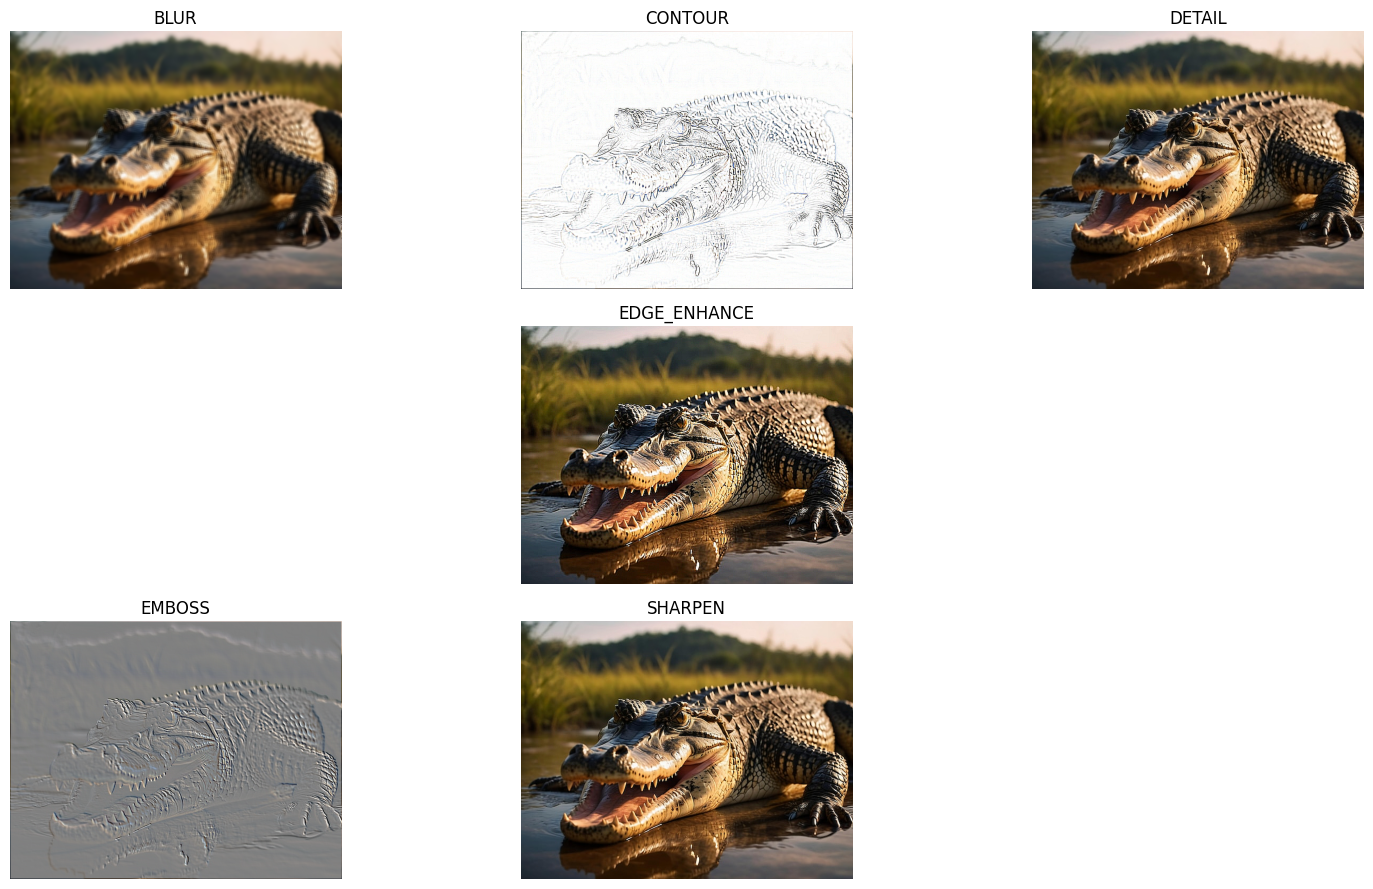

In [5]:
# Load image
img = Image.open('Data/2.jpg')

# Apply different filters
filters = [
    ('BLUR', img.filter(ImageFilter.BLUR)),
    ('CONTOUR', img.filter(ImageFilter.CONTOUR)),
    ('DETAIL', img.filter(ImageFilter.DETAIL)),
    ('EDGE_ENHANCE', img.filter(ImageFilter.EDGE_ENHANCE)),
    ('EMBOSS', img.filter(ImageFilter.EMBOSS)),
    ('SHARPEN', img.filter(ImageFilter.SHARPEN))
]

# Create custom subplot layout
plt.figure(figsize=(16, 9))

for i, (filter_name, filtered_img) in enumerate(filters):
    if i < 3:
        plt.subplot(3, 3, i + 1)  # First row: positions 1, 2, 3
    elif i == 3:
        plt.subplot(3, 3, 5)      # Second row: position 5 (center)
    else:
        plt.subplot(3, 3, i + 3)  # Third row: positions 7, 8

    plt.imshow(filtered_img)
    plt.title(filter_name)
    plt.axis('off')

plt.tight_layout()
plt.show()